In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%pip install lightgbm
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV


warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

Note: you may need to restart the kernel to use updated packages.


C:\Users\ddhap\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# load dataset
ames = pd.read_csv('Ames_HousePrice.csv', index_col=0)
ames.head(2)

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  LotArea  \
1  909176150        856     126000          30       RL          NaN     7890   
2  905476230       1049     139500         120       RL         42.0     4235   

  Street Alley LotShape  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
1   Pave   NaN      Reg  ...         166        0    NaN   NaN         NaN   
2   Pave   NaN      Reg  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold YrSold SaleType  SaleCondition  
1       0      3   2010      WD          Normal  
2       0      2   2009      WD          Normal  

[2 rows x 81 columns]

### Understand the Ames dataset

In [3]:
ames.shape

(2580, 81)

In [4]:
ames.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [5]:
# # # DataFRame is full of 'NA' or blank entries that need to be turned to proper NAN
# ames = ames.replace(['NA', ''], np.NaN)

In [6]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseStyl

In [7]:
# Ames description
ames.describe(include='all')

PID    GrLivArea      SalePrice   MSSubClass MSZoning  \
count   2.580000e+03  2580.000000    2580.000000  2580.000000     2580   
unique           NaN          NaN            NaN          NaN        7   
top              NaN          NaN            NaN          NaN       RL   
freq             NaN          NaN            NaN          NaN     2008   
mean    7.148300e+08  1486.039922  178059.623256    57.691860      NaN   
std     1.886626e+08   488.650181   75031.089374    42.802105      NaN   
min     5.263011e+08   334.000000   12789.000000    20.000000      NaN   
25%     5.313630e+08  1112.000000  129975.000000    20.000000      NaN   
50%     5.354546e+08  1436.000000  159900.000000    50.000000      NaN   
75%     9.071811e+08  1733.000000  209625.000000    70.000000      NaN   
max     1.007100e+09  4676.000000  755000.000000   190.000000      NaN   

        LotFrontage        LotArea Street Alley LotShape  ...  ScreenPorch  \
count   2118.000000    2580.000000   2580   168     2580  ...  2580.000000   
unique          NaN            NaN      2     2        4  ...          NaN   
top             NaN            NaN   Pave  Grvl      Reg  ...          NaN   
freq            NaN            NaN   2570   105     1641  ...          NaN   
mean      68.516053   10120.153488    NaN   NaN      NaN  ...    16.200388   
std       22.835831    8126.937892    NaN   NaN      NaN  ...    56.824783   
min       21.000000    1300.000000    NaN   NaN      NaN  ...     0.000000   
25%       57.000000    7406.750000    NaN   NaN      NaN  ...     0.000000   
50%       68.000000    9391.000000    NaN   NaN      NaN  ...     0.000000   
75%       80.000000   11494.000000    NaN   NaN      NaN  ...     0.000000   
max      313.000000  215245.000000    NaN   NaN      NaN  ...   576.000000   

           PoolArea PoolQC  Fence MiscFeature       MiscVal       MoSold  \
count   2580.000000      9    525          97   2580.000000  2580.000000   
unique          NaN      4      4           4           NaN          NaN   
top             NaN     TA  MnPrv        Shed           NaN          NaN   
freq            NaN      3    301          88           NaN          NaN   
mean       1.662016    NaN    NaN         NaN     48.731395     6.150775   
std       30.339396    NaN    NaN         NaN    498.725058     2.670647   
min        0.000000    NaN    NaN         NaN      0.000000     1.000000   
25%        0.000000    NaN    NaN         NaN      0.000000     4.000000   
50%        0.000000    NaN    NaN         NaN      0.000000     6.000000   
75%        0.000000    NaN    NaN         NaN      0.000000     8.000000   
max      800.000000    NaN    NaN         NaN  15500.000000    12.000000   

             YrSold SaleType  SaleCondition  
count   2580.000000     2580           2580  
unique          NaN       10              6  
top             NaN      WD          Normal  
freq            NaN     2392           2414  
mean    2007.838372      NaN            NaN  
std        1.312333      NaN            NaN  
min     2006.000000      NaN            NaN  
25%     2007.000000      NaN            NaN  
50%     2008.000000      NaN            NaN  
75%     2009.000000      NaN            NaN  
max     2010.000000      NaN            NaN  

[11 rows x 81 columns]

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

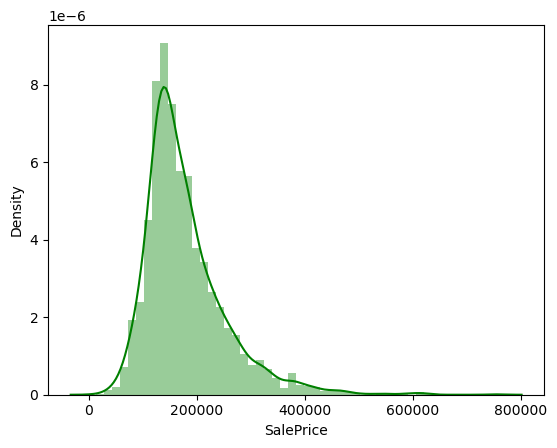

In [8]:
# target variable analysis
sns.distplot(ames["SalePrice"], color = 'g')

In [9]:
ames['SalePrice'].describe()

count      2580.000000
mean     178059.623256
std       75031.089374
min       12789.000000
25%      129975.000000
50%      159900.000000
75%      209625.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='LogSalePrice', ylabel='Density'>

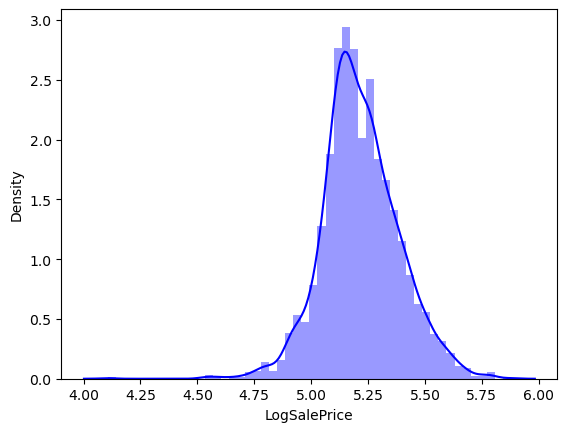

In [10]:
# standardization of target variable (logarithmic version)
ames["LogSalePrice"] = np.log10(ames["SalePrice"])
sns.distplot(ames["LogSalePrice"],color = 'b')

### Handling missing Values and Data Preprocessing

In [11]:
ames.duplicated().sum()

1

In [12]:
ames.drop_duplicates()

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
1    909176150        856     126000          30       RL          NaN   
2    905476230       1049     139500         120       RL         42.0   
3    911128020       1001     124900          30  C (all)         60.0   
4    535377150       1039     114000          70       RL         80.0   
5    534177230       1665     227000          60       RL         70.0   
..         ...        ...        ...         ...      ...          ...   
759  903205040        952     121000          30       RL          NaN   
760  905402060       1733     139600          20       RL          NaN   
761  909275030       2002     145000          90       RH         82.0   
762  907192040       1842     217500          60       RL          NaN   
763  906223180       1911     215000          60       RL         80.0   

     LotArea Street Alley LotShape  ... PoolArea PoolQC Fence MiscFeature  \
1       7890   Pave   NaN      Reg  ...        0    NaN   NaN         NaN   
2       4235   Pave   NaN      Reg  ...        0    NaN   NaN         NaN   
3       6060   Pave   NaN      Reg  ...        0    NaN   NaN         NaN   
4       8146   Pave   NaN      Reg  ...        0    NaN   NaN         NaN   
5       8400   Pave   NaN      Reg  ...        0    NaN   NaN         NaN   
..       ...    ...   ...      ...  ...      ...    ...   ...         ...   
759     8854   Pave   NaN      Reg  ...        0    NaN   NaN         NaN   
760    13680   Pave   NaN      IR1  ...        0    NaN   NaN         NaN   
761     6270   Pave   NaN      Reg  ...        0    NaN   NaN         NaN   
762     8826   Pave   NaN      Reg  ...        0    NaN   NaN         NaN   
763     9554   Pave   NaN      IR1  ...        0    NaN   NaN         NaN   

    MiscVal MoSold YrSold SaleType SaleCondition  LogSalePrice  
1         0      3   2010      WD         Normal      5.100371  
2         0      2   2009      WD         Normal      5.144574  
3         0     11   2007      WD         Normal      5.096562  
4         0      5   2009      WD         Normal      5.056905  
5         0     11   2009      WD         Normal      5.356026  
..      ...    ...    ...      ...           ...           ...  
759       0      5   2009      WD         Normal      5.082785  
760       0      6   2009      WD         Normal      5.144885  
761       0      8   2007      WD         Normal      5.161368  
762       0      7   2007      WD         Normal      5.337459  
763       0      9   2006      WD         Normal      5.332438  

[2579 rows x 82 columns]

In [13]:
pd.reset_option('max_rows')
pd.options.display.max_rows=None ## shows all the rows
ames.isnull().sum()

PID                 0
GrLivArea           0
SalePrice           0
MSSubClass          0
MSZoning            0
LotFrontage       462
LotArea             0
Street              0
Alley            2412
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType         14
MasVnrArea         14
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           69
BsmtCond           69
BsmtExposure       71
BsmtFinType1       69
BsmtFinSF1          1
BsmtFinType2       70
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF  

In [14]:
# the classes of the variable
ames.LotFrontage.value_counts()

60.0     246
80.0     128
70.0     124
50.0     111
75.0      92
65.0      79
85.0      64
24.0      49
21.0      46
78.0      42
63.0      42
90.0      41
74.0      38
68.0      36
72.0      31
64.0      30
73.0      28
79.0      27
62.0      26
52.0      26
100.0     24
51.0      23
57.0      23
76.0      22
59.0      22
66.0      22
55.0      22
88.0      21
82.0      20
53.0      20
43.0      19
67.0      19
40.0      17
56.0      17
61.0      17
35.0      16
69.0      16
71.0      16
44.0      15
81.0      15
110.0     14
84.0      14
95.0      13
48.0      13
58.0      13
34.0      13
77.0      13
41.0      13
96.0      12
120.0     12
98.0      11
86.0      11
42.0      11
87.0      10
83.0      10
105.0     10
54.0       9
36.0       9
92.0       9
45.0       9
94.0       9
102.0      8
30.0       8
32.0       8
93.0       8
91.0       7
37.0       7
47.0       7
89.0       6
99.0       6
108.0      5
39.0       5
130.0      5
49.0       5
129.0      4
114.0      4
118.0      4

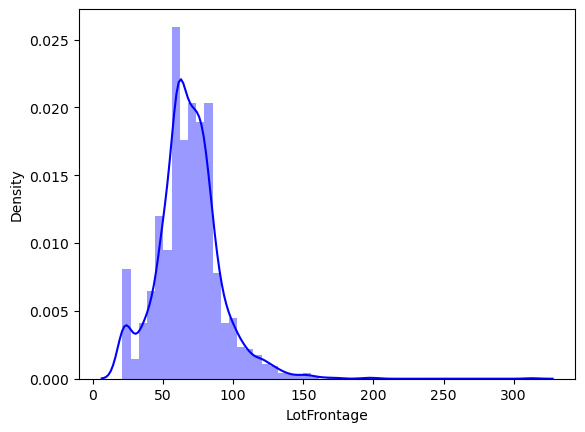

In [15]:
# plot of the variable LotFrontage
sns.distplot(ames["LotFrontage"],color = 'b')
plt.show()

In [16]:
# mean value LotFrontage
ames['LotFrontage'].mean()

68.51605288007555

In [17]:
# The Percentage of data missing in LotFrontage
print(ames.LotFrontage.isnull().sum()/len(ames)*100)

17.906976744186046


In [18]:
ames.loc[ames['LotFrontage'].isnull()==True].head()

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
1   909176150        856     126000          30       RL          NaN   
14  535105100       1394     159000          20       RL          NaN   
19  534152050       1610     205000          20       RL          NaN   
28  533221090       1573     177500         160       FV          NaN   
29  534128010       2090     200000          60       RL          NaN   

    LotArea Street Alley LotShape  ... PoolArea PoolQC Fence MiscFeature  \
1      7890   Pave   NaN      Reg  ...        0    NaN   NaN         NaN   
14     9500   Pave   NaN      IR1  ...        0    NaN   NaN         NaN   
19    10603   Pave   NaN      IR1  ...        0    NaN   NaN         NaN   
28     2117   Pave   NaN      Reg  ...        0    NaN   NaN         NaN   
29    10382   Pave   NaN      IR1  ...        0    NaN   NaN        Shed   

   MiscVal MoSold YrSold SaleType SaleCondition  LogSalePrice  
1        0      3   2010      WD         Normal      5.100371  
14       0      7   2009      WD         Normal      5.201397  
19       0      2   2010      WD         Normal      5.311754  
28       0      6   2010      WD         Normal      5.249198  
29     350     11   2009      WD         Normal      5.301030  

[5 rows x 82 columns]

In [19]:
# fill empty values in variable LotFrontage with mean
ames.loc[ames['LotFrontage'].isnull()==True,'LotFrontage']=68.52

In [20]:
# Features with over 80 % missing values
ames1=ames[['Alley','PoolQC','Fence','MiscFeature']]
a1=ames1.isnull().sum()/len(ames1)*100
a1

Alley          93.488372
PoolQC         99.651163
Fence          79.651163
MiscFeature    96.240310
dtype: float64

In [21]:
ames.drop(['Alley','PoolQC','Fence','MiscFeature','MiscVal'],axis=1,inplace=True)

In [22]:
# Percentage of missing values
ames2=ames[['BsmtFullBath','BsmtHalfBath', 'BsmtQual','BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinSF1', 'BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']]
a2=ames2.isnull().sum()/len(ames2)*100
a2

BsmtFullBath    0.077519
BsmtHalfBath    0.077519
BsmtQual        2.674419
BsmtCond        2.674419
BsmtExposure    2.751938
BsmtFinType1    2.674419
BsmtFinSF1      0.038760
BsmtFinType2    2.713178
BsmtFinSF2      0.038760
BsmtUnfSF       0.038760
TotalBsmtSF     0.038760
dtype: float64

In [23]:
# Replace missing values with 'NA'
ames['BsmtQual']=ames['BsmtQual'].fillna('NA')
ames['BsmtCond']=ames['BsmtCond'].fillna('NA')
ames['BsmtExposure']=ames['BsmtExposure'].fillna('NA')
ames['BsmtFinType1']=ames['BsmtFinType1'].fillna('NA')
ames['BsmtFinType2']=ames['BsmtFinType2'].fillna('NA')
ames['BsmtFinSF1']=ames['BsmtFinSF1'].fillna(0)
ames['BsmtFinSF2']=ames['BsmtFinSF2'].fillna(0)
ames['BsmtUnfSF']=ames['BsmtUnfSF'].fillna(0)
ames['TotalBsmtSF']=ames['TotalBsmtSF'].fillna(0)
ames['BsmtFullBath']=ames['BsmtFullBath'].fillna(0)
ames['BsmtHalfBath']=ames['BsmtHalfBath'].fillna(0)

In [24]:
ames.MasVnrType.value_counts()

None       1559
BrkFace     804
Stone       183
BrkCmn       20
Name: MasVnrType, dtype: int64

In [25]:
# Replace missing values with 'None'
ames.loc[ames['MasVnrType'].isnull()==True,'MasVnrType']='None'

<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

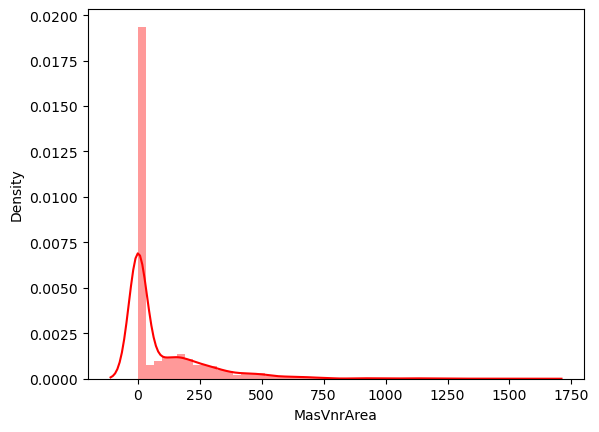

In [26]:
sns.distplot(ames["MasVnrArea"],color = 'r')

In [27]:
ames['MasVnrArea'].median()

0.0

In [28]:
# Replace missing values MasVnrArea with median
ames.loc[ames['MasVnrArea'].isnull()==True,'MasVnrArea']=0.0

In [29]:
ames3=ames[['GarageCars','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond' ]]
a3=ames3.isnull().sum()/len(ames3)*100
a3

GarageCars      0.038760
GarageType      4.922481
GarageYrBlt     5.000000
GarageFinish    5.000000
GarageQual      5.000000
GarageCond      5.000000
dtype: float64

In [30]:
# Replace missing values with 'NA' and 0
ames['GarageType']=ames['GarageType'].fillna('NA')
ames['GarageFinish']=ames['GarageFinish'].fillna('NA')
ames['GarageQual']=ames['GarageQual'].fillna('NA')
ames['GarageCond']=ames['GarageCond'].fillna('None')
ames['GarageCars']=ames['GarageCars'].fillna(0)
ames['GarageArea']=ames['GarageArea'].fillna(0)

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

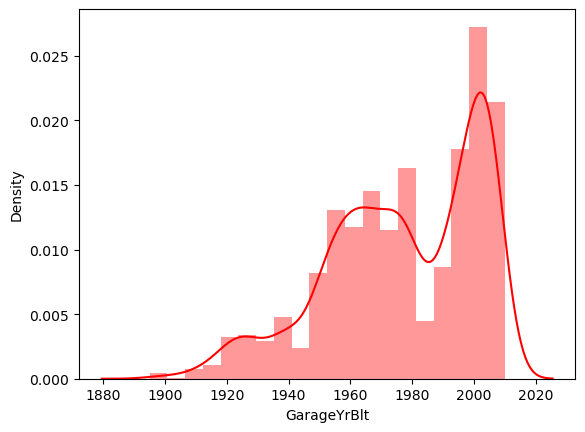

In [31]:
sns.distplot(ames["GarageYrBlt"],color = 'r')

In [32]:
ames.GarageYrBlt.median()

1978.0

In [33]:
# Replace missing values GarageYrBlt with median
ames.loc[ames['GarageYrBlt'].isnull()==True,'GarageYrBlt']=1978.0

In [34]:
ames.Electrical.value_counts()

SBrkr    2365
FuseA     168
FuseF      39
FuseP       7
Name: Electrical, dtype: int64

In [35]:
# Replace missing values Electrical with SBrkr
ames.loc[ames['Electrical'].isnull()==True,'Electrical']='SBrkr'

In [36]:
ames.FireplaceQu.value_counts()

Gd    619
TA    572
Fa     70
Po     43
Ex     35
Name: FireplaceQu, dtype: int64

In [37]:
# Replace missing values FireplaceQu with NA
ames.loc[ames['FireplaceQu'].isnull()==True,'FireplaceQu']='NA'

In [38]:
ames.isnull().sum()

PID              0
GrLivArea        0
SalePrice        0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [39]:
ames['MSSubClass'] = ames['MSSubClass'].apply(str)
ames['MSSubClass'].dtype

dtype('O')

In [40]:
ames.MSZoning.unique() # 'C' are commercial properties
# Delete all data with MSZoning = commercial, agriculture and industrial as these are not residential units
ames = ames[(ames.MSZoning != 'C (all)') & (ames.MSZoning != 'I (all)') & (ames.MSZoning != 'A (agr)')]

In [41]:
ames.Condition2.value_counts()

Norm      2535
Feedr       12
PosN         3
Artery       3
PosA         3
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [42]:
#Condition2 is 99% Norm, therefore drop
ames = ames.drop(['Condition2'], axis = 1)

In [43]:
ames.RoofMatl.value_counts()

CompShg    2524
Tar&Grv      18
WdShake       8
WdShngl       7
Metal         1
Roll          1
Membran       1
Name: RoofMatl, dtype: int64

In [44]:
#drop RoofMatl as 98% of values in full dataset are CompShg
ames = ames.drop(['RoofMatl'], axis = 1)

In [45]:
ames.LowQualFinSF.value_counts()

0       2527
80         3
205        2
360        2
234        1
697        1
420        1
232        1
140        1
312        1
259        1
473        1
481        1
572        1
53         1
384        1
108        1
390        1
1064       1
120        1
397        1
512        1
436        1
362        1
144        1
528        1
514        1
114        1
156        1
479        1
Name: LowQualFinSF, dtype: int64

In [46]:
#drop LowQualFinSF variable given 99% of values are 0
ames = ames.drop(['LowQualFinSF'], axis = 1)

In [47]:
#given 99% of values in Utilities are AllPub, this doesn't add much information and should therefore be dropped
ames = ames.drop(["Utilities"], axis = 1)

## Feature Engineering

In [48]:
# Add Home age variable depending if there was a major remodeling
ames['Age'] = ames.apply(lambda x: x['YrSold']-x['YearBuilt'] if (x['YearBuilt']<x['YearRemodAdd'])
                                                                else (x['YrSold']-x['YearRemodAdd']), axis=1)

In [49]:
#create new variable Is_Newer_SubClss capturing age using the MSSubClass variable 1- 1946 & NEWER ALL STYLES, 0 - 1945 & OLDER
ames['NewerH_SubClass'] = ames['MSSubClass'].replace({20:1, 30:0, 40:0, 45:0, 50:0, 60:1, 70:0, 75:0, 80:0, 85:0, 90:0, 120:1, 150:0, 160:1, 180:0, 190:0})
ames['NewerH_SubClass'] = ames['NewerH_SubClass'].apply(str)

In [50]:
#given 95% of LandSlope variables are for 'Gentle' slope, create 0/1 dummy variable for gentle vs non-gentle slopes
ames['Slope_Gentle'] = (ames["LandSlope"] == "Gtl") * 1
ames['Slope_Gentle'] = ames['Slope_Gentle'].apply(str)
ames = ames.drop(['LandSlope'], axis = 1)

In [51]:
#create a TotalArea variable based on other square footage variables in dataset 
total_area_cols = ['LotArea','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 
                 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
ames["TotalArea"] = ames[total_area_cols].sum(axis=1)

In [52]:
#create a proximity to railroad variable from Condition1 values
railroad = ['RRNn', 'RRAn', 'RRNe', 'RRAe']
ames['RR_prox'] = ames['Condition1'].apply(lambda x: 1 if x in railroad else 0)
ames['RR_prox'] = ames['RR_prox'].apply(str)

In [53]:
# Create a total "finished" basement square footage variable
ames['BsmtLivArea'] = ames.TotalBsmtSF - ames.BsmtUnfSF

## Outlier Analysis and removal

In [54]:
# There are __ instances of 'SalePrice' being 3 std above the mean
ames.SalePrice[(ames.SalePrice > np.mean(ames.SalePrice) + 3*np.std(ames.SalePrice))].count()

42

In [55]:
# But there are zero cases of the opposite
ames.SalePrice[(ames.SalePrice < np.mean(ames.SalePrice) - 3*np.std(ames.SalePrice))].count()

0

In [56]:
# There are 25 instances of 'GrLivArea' being 3 std above the mean, but zero of the opposite
ames.GrLivArea[(ames.GrLivArea > np.mean(ames.GrLivArea) + 3*np.std(ames.GrLivArea))].count()

19

In [57]:
ames.GrLivArea[(ames.GrLivArea < np.mean(ames.GrLivArea) - 3*np.std(ames.GrLivArea))].count()

0

In [58]:
# There are 6 instances of 'BaseLivArea' being 3 std above the mean, but zero of the opposite
ames.BsmtLivArea[(ames.BsmtLivArea > np.mean(ames.BsmtLivArea) + 3*np.std(ames.BsmtLivArea))].count()

13

In [59]:
ames.BsmtLivArea[(ames.BsmtLivArea < np.mean(ames.BsmtLivArea) - 3*np.std(ames.BsmtLivArea))].count()

0

In [60]:
ames.shape

(2560, 78)

In [61]:
ames = ames[(ames.SalePrice < np.mean(ames.SalePrice) + 3*np.std(ames.SalePrice))]

In [62]:
ames = ames[(ames.GrLivArea < np.mean(ames.GrLivArea) + 3*np.std(ames.GrLivArea))]

In [63]:
ames = ames[(ames.BsmtLivArea < np.mean(ames.BsmtLivArea) + 3*np.std(ames.BsmtLivArea))]

In [64]:
# All in all, 66 outliers are deleted
ames.shape 

(2499, 78)

### EDA

In [65]:
# numeric and categorical variables

ames_cat = list(ames.select_dtypes(include = [object]).columns)
ames_num = list(ames.select_dtypes(include = [int,float]).columns)

print(ames_cat)
print('\n')
print(ames_num)

['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'NewerH_SubClass', 'Slope_Gentle', 'RR_prox']


['PID', 'GrLivArea', 'SalePrice', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Pool

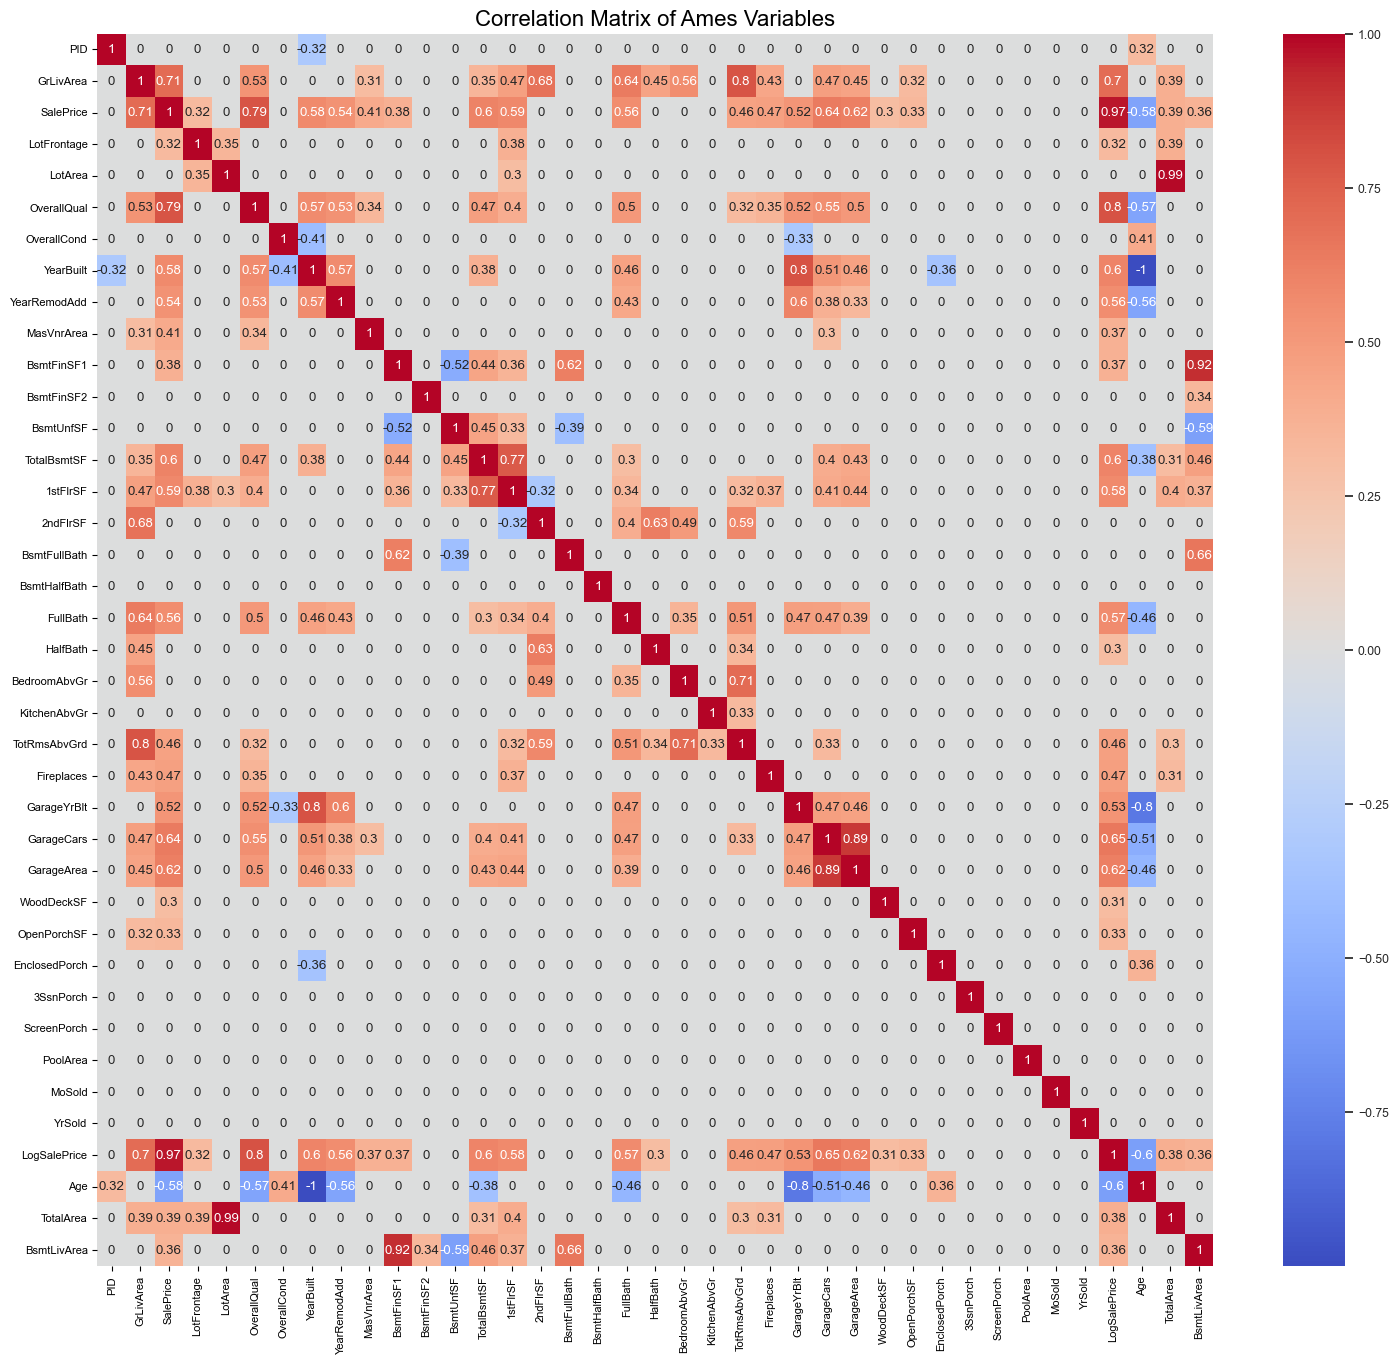

In [66]:
fig, ax = plt.subplots(figsize=(18, 16))
# Correlation analysis
corr_matrix = ames[ames_num].corr()

# reset the insignificant degrees and increase the sensitivity
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0

# correlation matrix
sns.set(font_scale=0.8)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_title("Correlation Matrix of Ames Variables", fontsize=16)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=8)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=8)
plt.show()

In [67]:
# Let's find the most related variables with the SalePrice variable.
# since the first 2 has a SalePrice and LogSalePrice variable [2:8]
corr =ames.corr()["SalePrice"].sort_values(ascending = False)[2:8]
corr

OverallQual    0.792505
GrLivArea      0.705193
GarageCars     0.640690
GarageArea     0.624852
TotalBsmtSF    0.602886
1stFlrSF       0.585690
Name: SalePrice, dtype: float64

In [68]:
# Let's find the most related variables with the SalePrice variable.
# since the first 2 has a SalePrice and LogSalePrice variable [2:10]
corr =ames.corr()["SalePrice"].sort_values(ascending = False)[2:10]
corr

OverallQual    0.792505
GrLivArea      0.705193
GarageCars     0.640690
GarageArea     0.624852
TotalBsmtSF    0.602886
1stFlrSF       0.585690
YearBuilt      0.577160
FullBath       0.557300
Name: SalePrice, dtype: float64

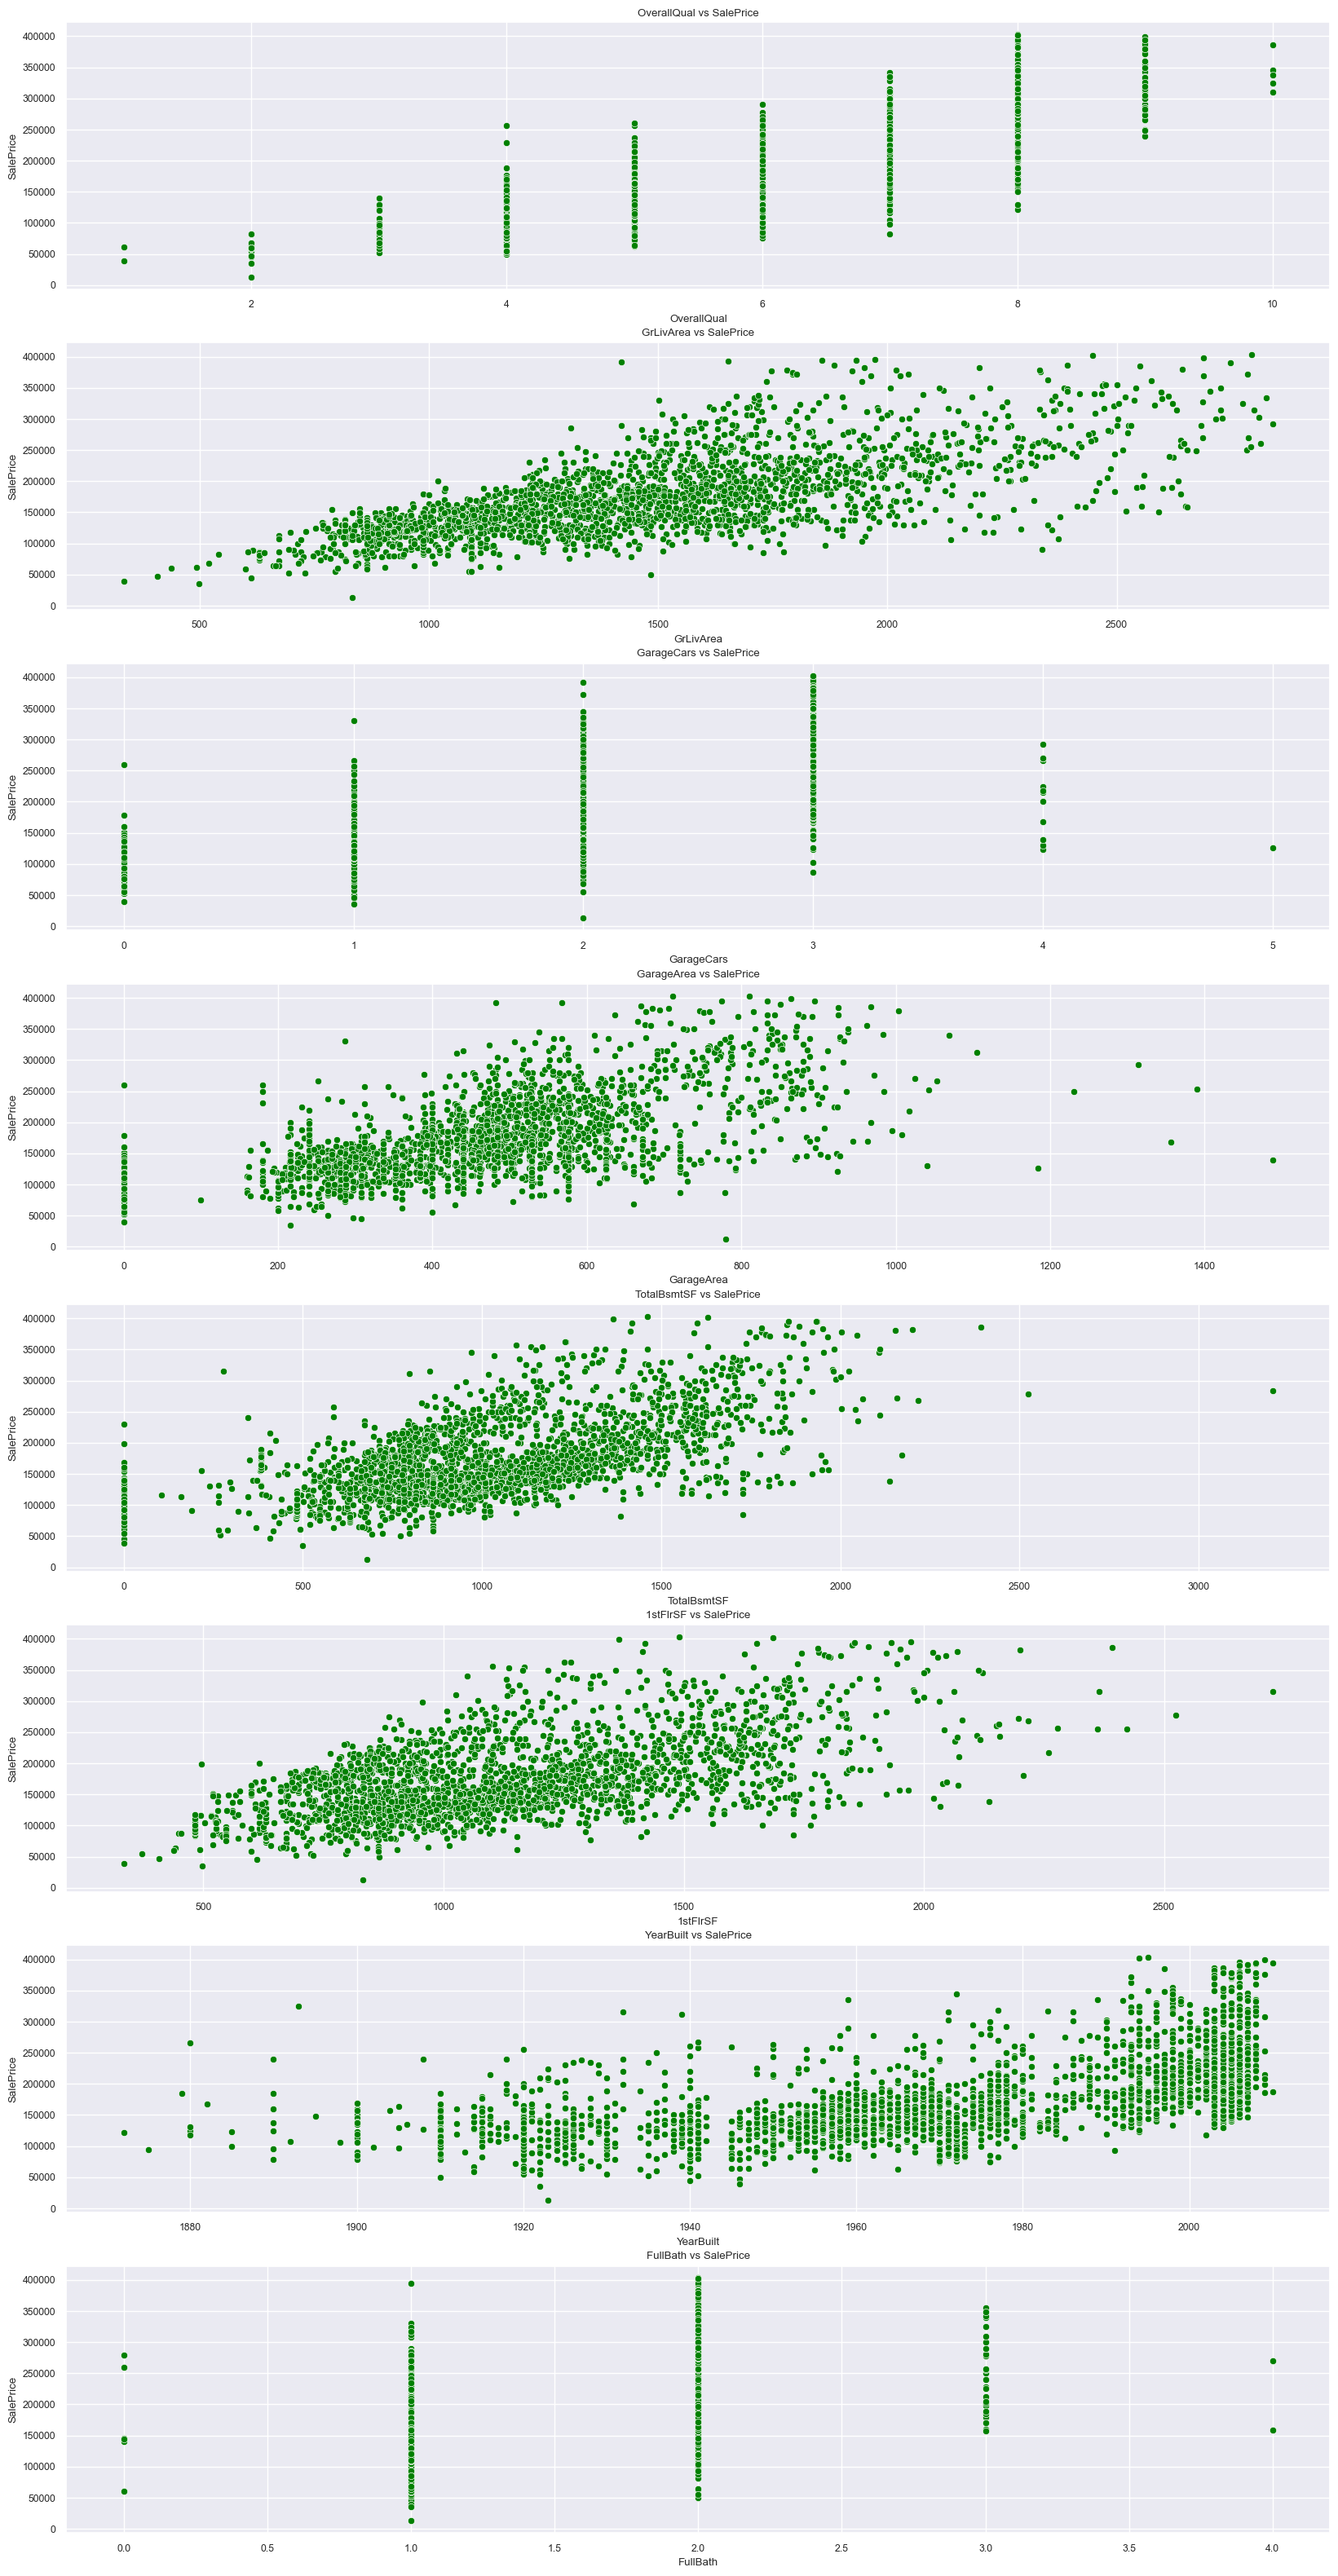

In [69]:
f,ax = plt.subplots(nrows = 8,ncols = 1, figsize = (20,40))
for i,col in enumerate(corr.index):    
    sns.scatterplot(x = col, y = "SalePrice", data = ames, ax = ax[i], color = 'green')
    ax[i].set_title(f'{col} vs SalePrice')
    
# We can see the variables that have a positive correlation with the price variable.
# These are the variables that affect the price the most.

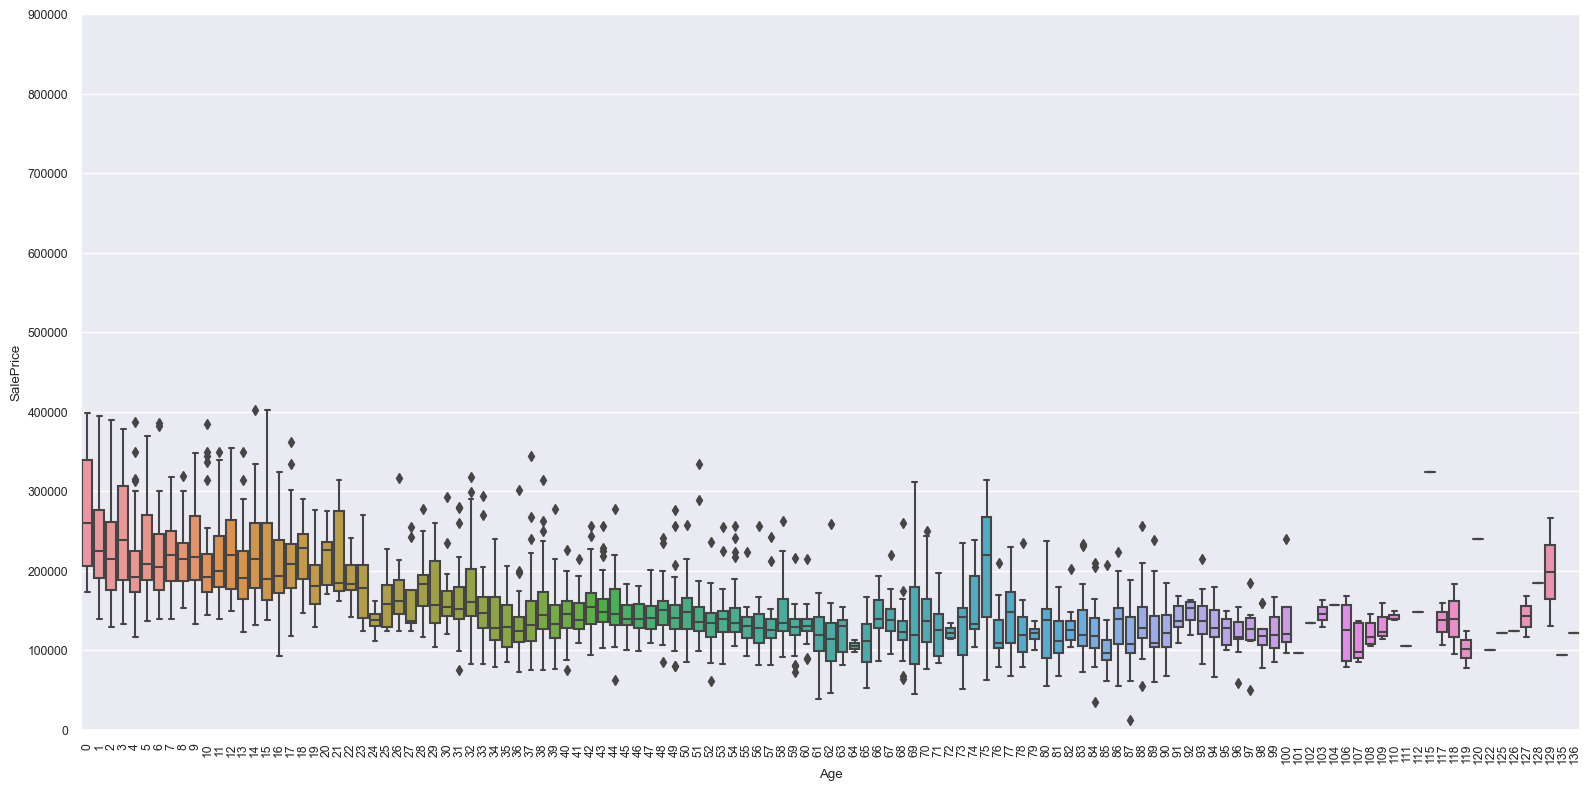

In [70]:
# Relationship between building age and price

f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x="Age", y="SalePrice", data=ames,)
fig.axis(ymin=0, ymax=900000);
plt.xticks(rotation=90);
plt.tight_layout()

Text(0.5, 1.0, 'Year Built')

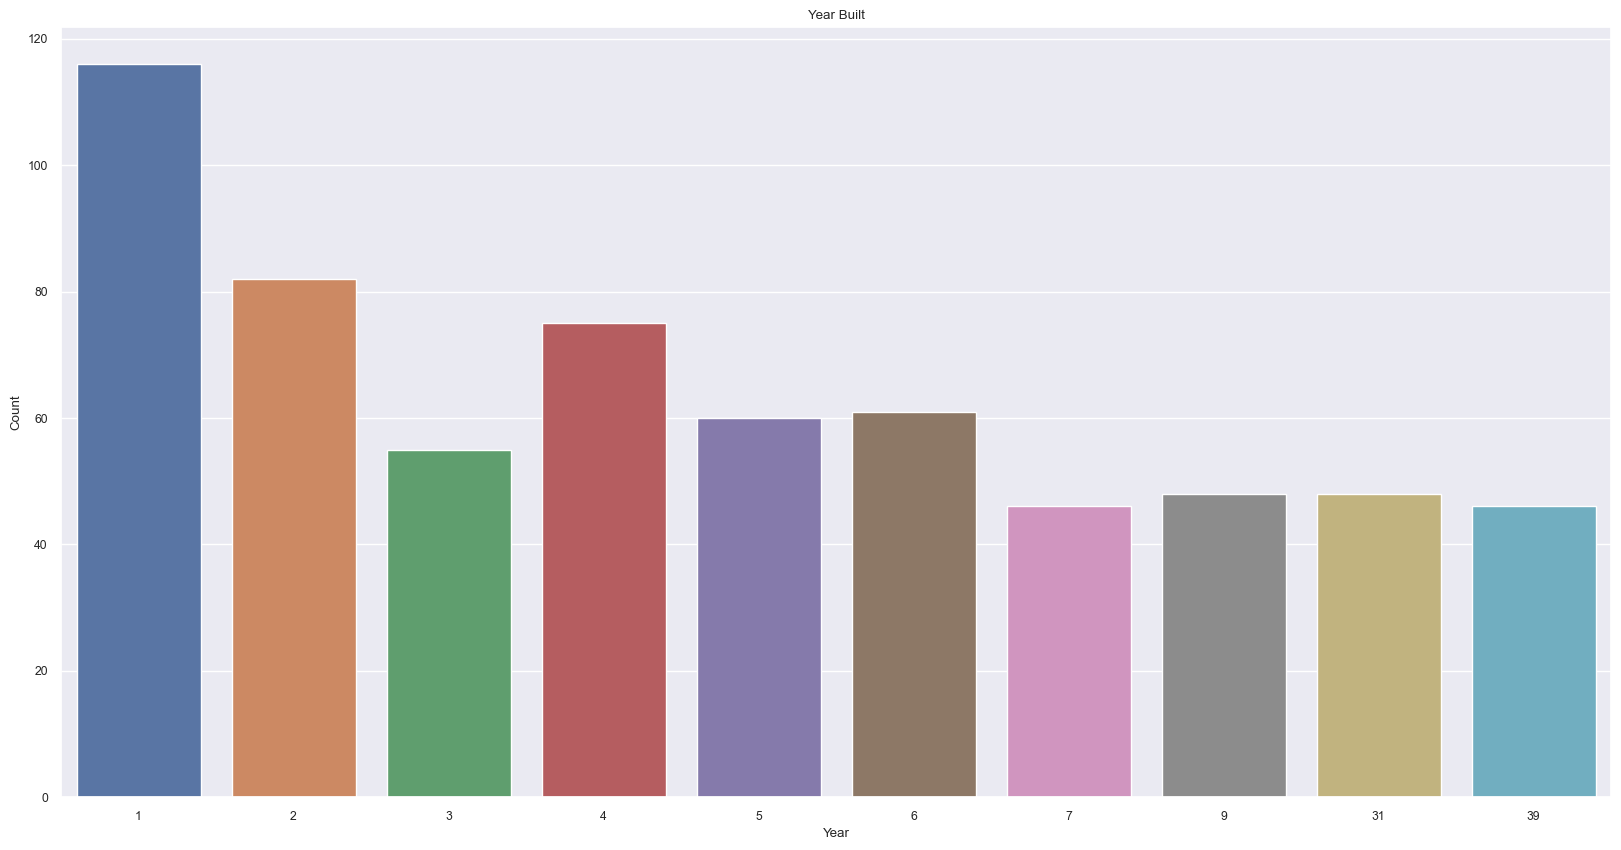

In [71]:
yr_built = pd.DataFrame({"Count":ames["Age"].value_counts()[:10]}).reset_index()
yr_built.rename(columns={'index':'Year'},inplace=True)
plt.figure(figsize = (20,10))
sns.barplot(x = 'Year', y = "Count", data = yr_built)
plt.title("Year Built")

Text(0.5, 1.0, 'Year Built')

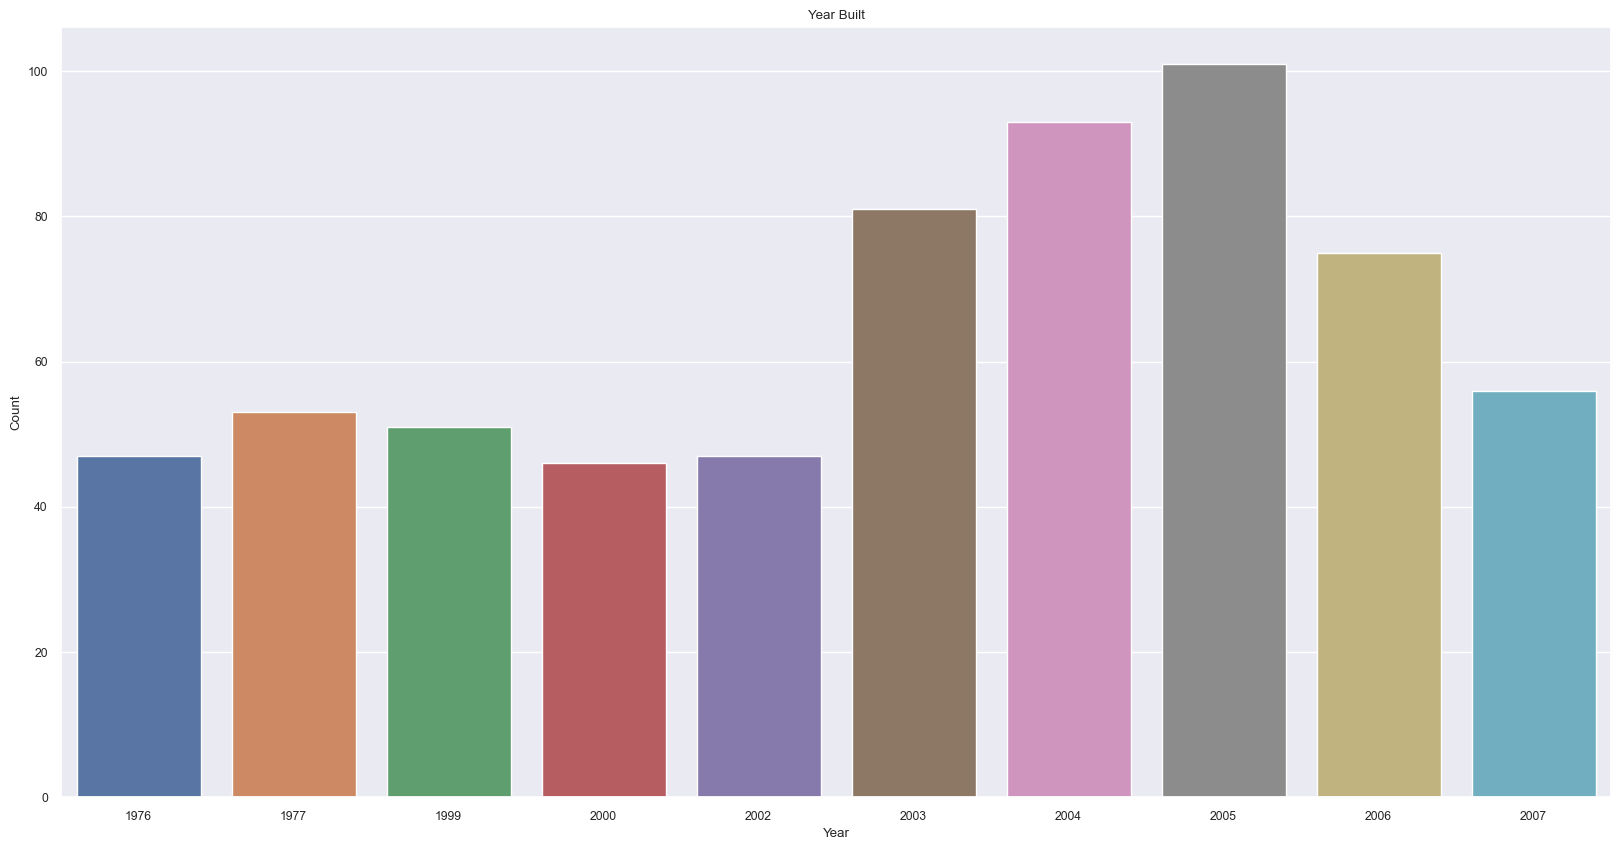

In [72]:
yr_built = pd.DataFrame({"Count":ames["YearBuilt"].value_counts()[:10]}).reset_index()
yr_built.rename(columns={'index':'Year'},inplace=True)
plt.figure(figsize = (20,10))
sns.barplot(x = 'Year', y = "Count", data = yr_built)
plt.title("Year Built")

In [73]:
# Analysis of categorial features
dtype_objects = list(columns for columns in ames.select_dtypes([object]).columns)
dtype_objects

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'NewerH_SubClass',
 'Slope_Gentle',
 'RR_prox']

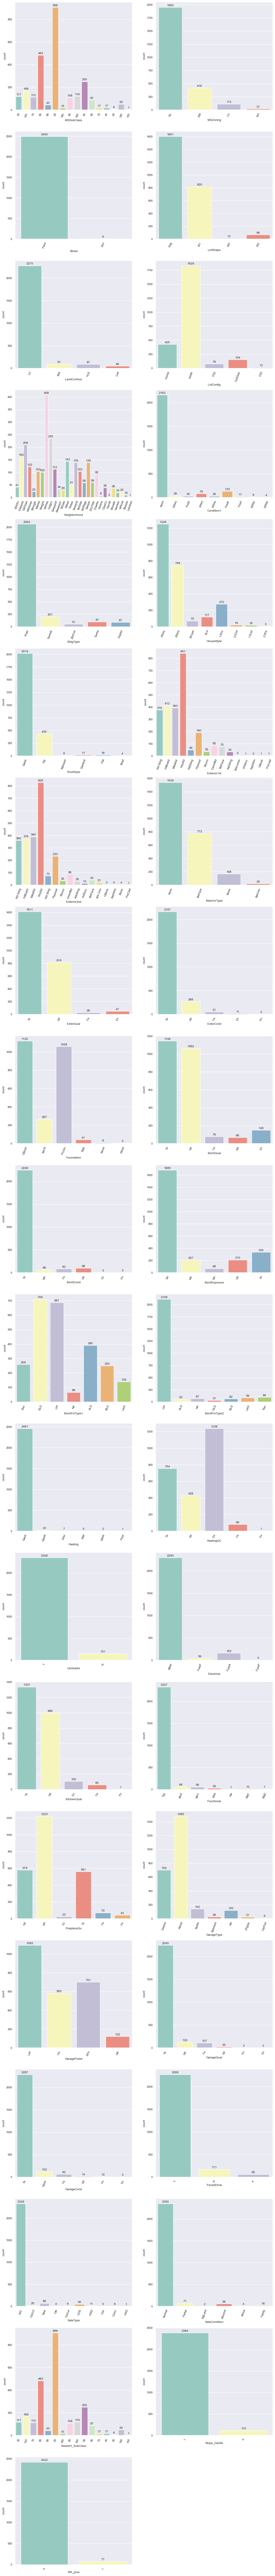

In [74]:
plt.figure(figsize=(15,150))
plotnumber=1
for c in dtype_objects:
    ax=plt.subplot(20,2,plotnumber)
    b= sns.countplot(x=ames[c],palette='Set3')
    plt.xticks(rotation=70)
    plotnumber+=1
    for bar in b.patches:
        b.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=10, xytext=(0, 6),textcoords='offset points')
plt.show() 

In [75]:
# Variable analysis of type "float"
dtype_float =list(columns for columns in ames.select_dtypes([float]).columns)

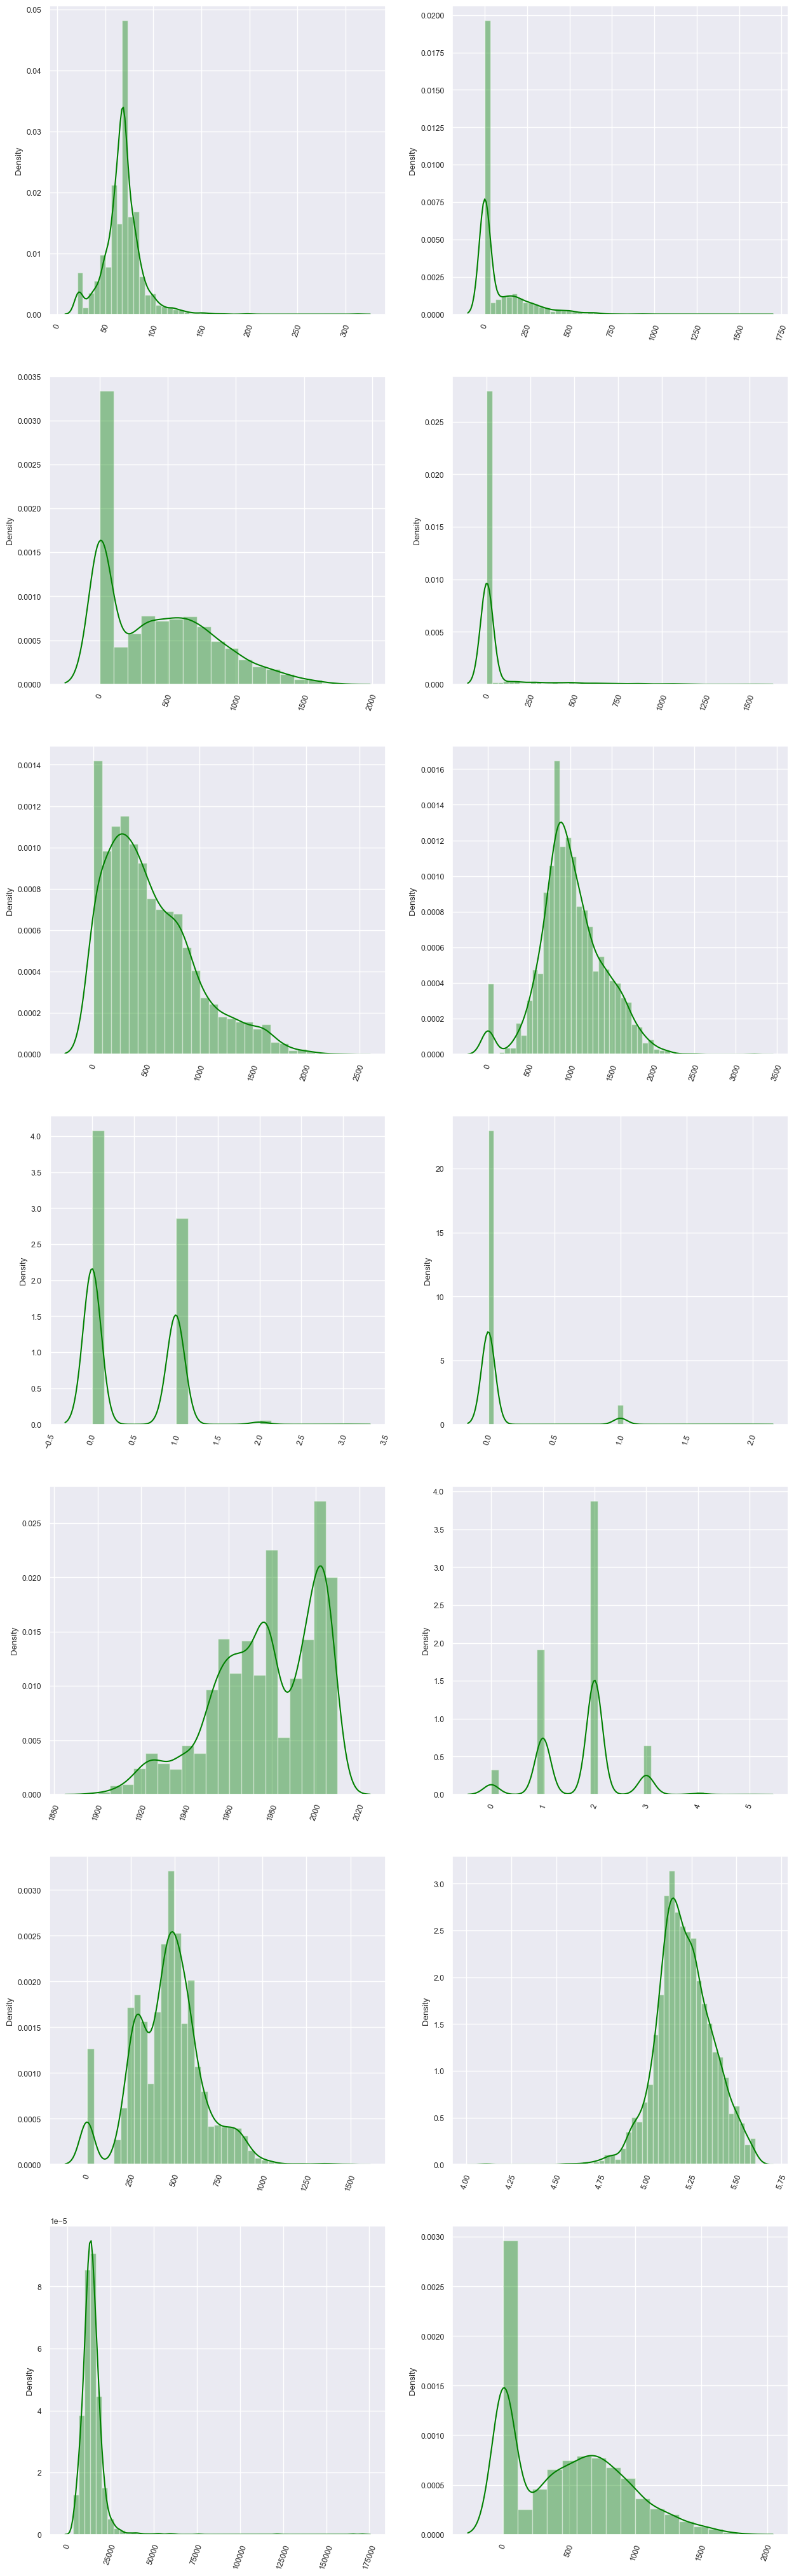

In [76]:
plt.figure(figsize=(15,150))
plotnumber=1
for a in dtype_float:
    ax=plt.subplot(20,2,plotnumber)
    sns.distplot(x=ames[a],color='green')
    plt.xticks(rotation=70)
    plotnumber+=1
plt.show() 

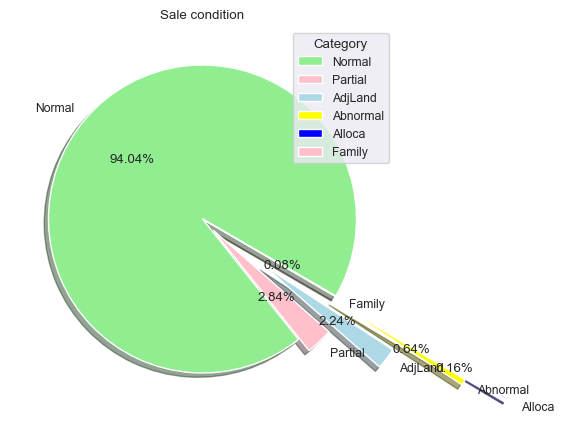

In [77]:
# plot Sale Condition

plt.figure(figsize=(5,5))
labels=['Normal','Partial','AdjLand', 'Abnormal', 'Alloca', 'Family']
size=ames['SaleCondition'].value_counts()
colors=['lightgreen','pink','lightblue', 'yellow', 'blue','pink' ]
explode=[0,0.1,0.5,1.0,1.3,0]
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%.2f%%',shadow = True,startangle = -30,
wedgeprops= {'edgecolor':'white','linewidth':1})
plt.legend(labels,loc="upper right",title='Category') ## used to label at the side
plt.title("Sale condition")
plt.show()

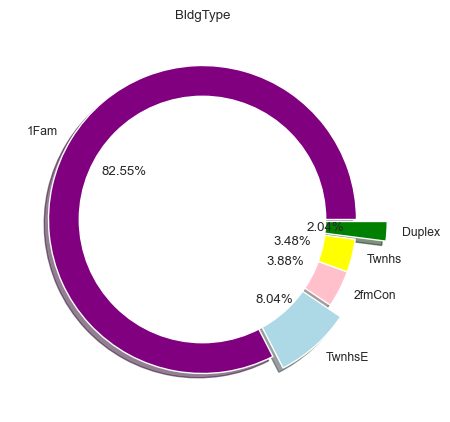

In [78]:
# plot BldgType
plt.figure(figsize=(5,5))
labels=['1Fam','TwnhsE','2fmCon','Twnhs', 'Duplex']
size=ames['BldgType'].value_counts()
colors=['purple','lightblue','pink','yellow', 'green']
explode=[0,0.1,0,0,0.2]
plt.pie(size,labels=labels,colors=colors,explode=explode,autopct='%.2f%%',shadow=True)
circle = plt.Circle( (0,0),0.8, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title("BldgType")
plt.show()

In [79]:
## Mulrivariant analysis

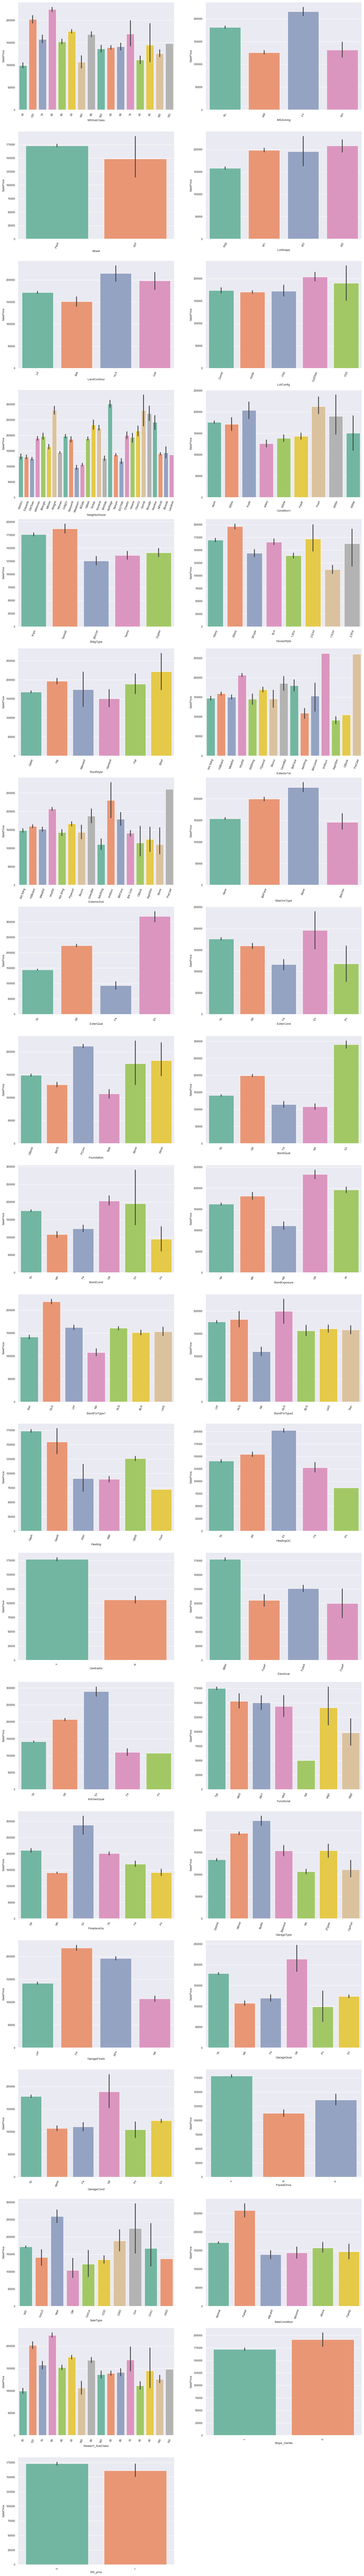

In [80]:
data=ames
plt.figure(figsize=(20,150),facecolor='white')
plotnumber=1
for c in dtype_objects:
    ax=plt.subplot(20,2,plotnumber)
    sns.barplot(x=data[c],y=data.SalePrice,palette='Set2')
    plotnumber+=1
    plt.xticks(rotation=70)
plt.show()

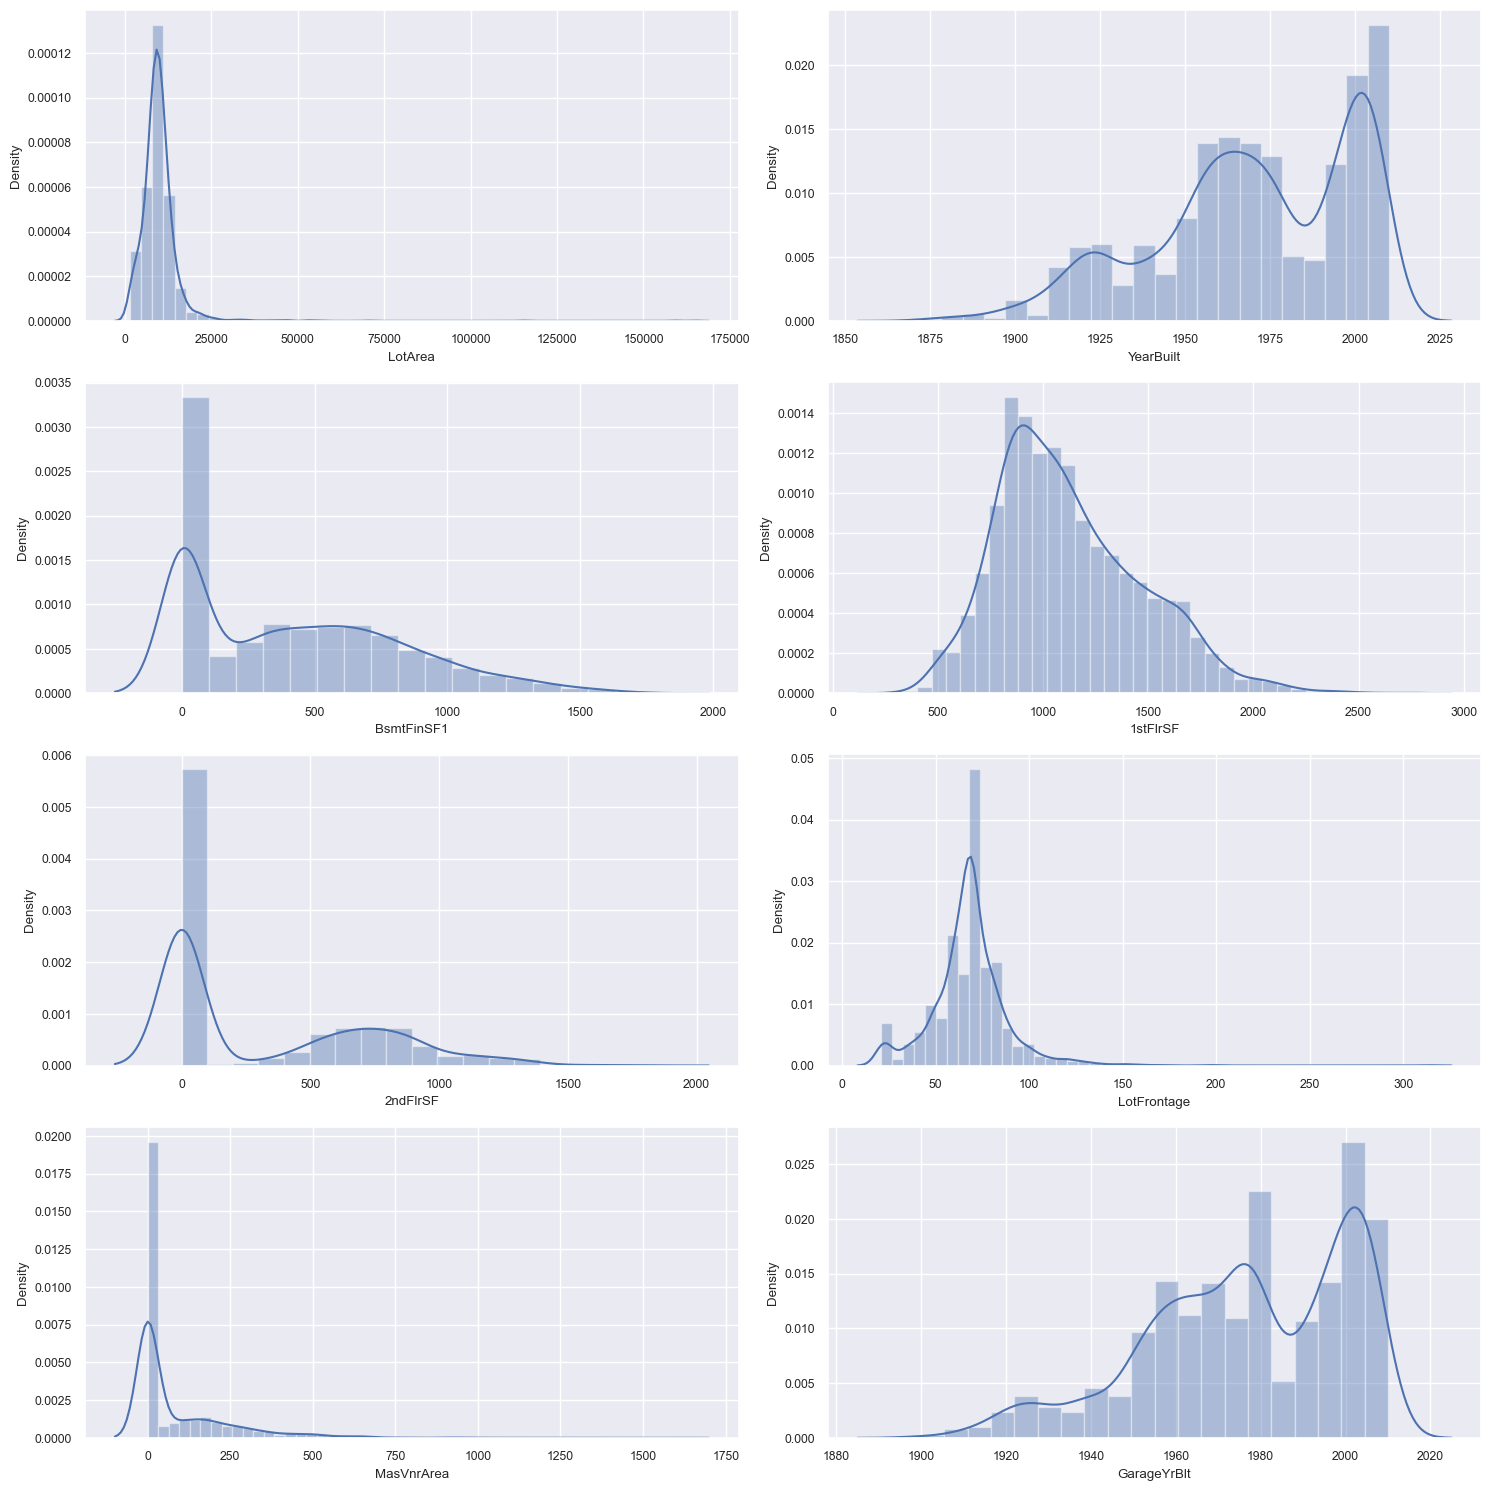

In [81]:
box=ames[['LotArea','YearBuilt','BsmtFinSF1','1stFlrSF','2ndFlrSF','LotFrontage', 'MasVnrArea', 'GarageYrBlt']]
plt.figure(figsize=(15,15),facecolor='white')

plotnum=1 #count

for c in box:
    if(plotnum<9):
        a=plt.subplot(4,2,plotnum)#plotting 8 graph
        sns.distplot(box[c])#to know distribution
    plotnum+=1#increment counter
plt.tight_layout()

### Label Encoder

In [82]:
# Encode the object variables
data_object = ames.select_dtypes(include = "object").columns
print (data_object)

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition', 'NewerH_SubClass', 'Slope_Gentle', 'RR_prox'],
      dtype='object')


In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for features in data_object:
    ames[features] = le.fit_transform(ames[features].astype(str))

print (ames.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499 entries, 1 to 763
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2499 non-null   int64  
 1   GrLivArea        2499 non-null   int64  
 2   SalePrice        2499 non-null   int64  
 3   MSSubClass       2499 non-null   int32  
 4   MSZoning         2499 non-null   int32  
 5   LotFrontage      2499 non-null   float64
 6   LotArea          2499 non-null   int64  
 7   Street           2499 non-null   int32  
 8   LotShape         2499 non-null   int32  
 9   LandContour      2499 non-null   int32  
 10  LotConfig        2499 non-null   int32  
 11  Neighborhood     2499 non-null   int32  
 12  Condition1       2499 non-null   int32  
 13  BldgType         2499 non-null   int32  
 14  HouseStyle       2499 non-null   int32  
 15  OverallQual      2499 non-null   int64  
 16  OverallCond      2499 non-null   int64  
 17  YearBuilt      

### Save a csv file for Modeling

In [84]:
ames.to_csv('ames_model.csv', encoding='utf-8')

In [85]:
ames.head(2)

PID  GrLivArea  SalePrice  MSSubClass  MSZoning  LotFrontage  \
1  909176150        856     126000           6         2        68.52   
2  905476230       1049     139500           0         2        42.00   

   LotArea  Street  LotShape  LandContour  ...  YrSold  SaleType  \
1     7890       1         3            3  ...    2010         9   
2     4235       1         3            3  ...    2009         9   

   SaleCondition  LogSalePrice  Age  NewerH_SubClass  Slope_Gentle  TotalArea  \
1              4      5.100371   71                6             1    11023.0   
2              4      5.144574   25                0             1     7753.0   

   RR_prox  BsmtLivArea  
1        0        238.0  
2        0        945.0  

[2 rows x 78 columns]